In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:

test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
print(train_df.shape)
print(test_df.shape)

(878049, 9)
(884262, 7)


In [3]:
print(train_df.columns)
print(test_df.columns)


Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')
Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')


In [4]:
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,13/05/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,13/05/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,13/05/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,13/05/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,13/05/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
test_df.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,10/05/2015 23:59,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,10/05/2015 23:51,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,10/05/2015 23:50,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,10/05/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,10/05/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


* Dates - timestamp of the crime incident
* Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
* Descript - detailed description of the crime incident (only in train.csv)
* DayOfWeek - the day of the week
* PdDistrict - name of the Police Department District
* Resolution - how the crime incident was resolved (only in train.csv)
* Address - the approximate street address of the crime incident
* X - Longitude
* Y - Latitude

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [16]:
test_df=test_df.drop(['Id'],axis=1)
test_df.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,10/05/2015 23:59,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,10/05/2015 23:51,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,10/05/2015 23:50,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,10/05/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,10/05/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [18]:
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Convert the 'Dates' column to datetime format in case
train_df['Dates'] = pd.to_datetime(train_df['Dates'], dayfirst=True)
test_df['Dates'] = pd.to_datetime(test_df['Dates'], dayfirst=True)

# Extract date and time components for train_df
train_df['Year'] = train_df['Dates'].dt.year
train_df['Month'] = train_df['Dates'].dt.month
train_df['Day'] = train_df['Dates'].dt.day
train_df['Hour'] = train_df['Dates'].dt.hour
train_df['Minute'] = train_df['Dates'].dt.minute
train_df['Second'] = train_df['Dates'].dt.second



# Extract date and time components for test_df
test_df['Year'] = test_df['Dates'].dt.year
test_df['Month'] = test_df['Dates'].dt.month
test_df['Day'] = test_df['Dates'].dt.day
# Extract time components for test_df
test_df['Hour'] = test_df['Dates'].dt.hour
test_df['Minute'] = test_df['Dates'].dt.minute
test_df['Second'] = test_df['Dates'].dt.second


train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute,Second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0


In [20]:
train_df = train_df.drop('Dates', axis=1)
test_df = test_df.drop('Dates', axis=1)

In [22]:
train_df.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute,Second
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0


In [24]:
test_df.head()

,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,Minute,Second
0,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,0
1,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,0
2,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,0
3,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0
4,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0


In [26]:
print('trian data\n',train_df.isnull().sum())
print('test data\n',test_df.isnull().sum())

trian data
 Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Year          0
Month         0
Day           0
Hour          0
Minute        0
Second        0
dtype: int64
test data
 DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
Year          0
Month         0
Day           0
Hour          0
Minute        0
Second        0
dtype: int64


In [28]:
print('number of duplicates rows in train ',train_df.duplicated().sum())
print('number of duplicates rows in test ',test_df.duplicated().sum())

number of duplicates rows in train  2323
number of duplicates rows in test  188352


In [30]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

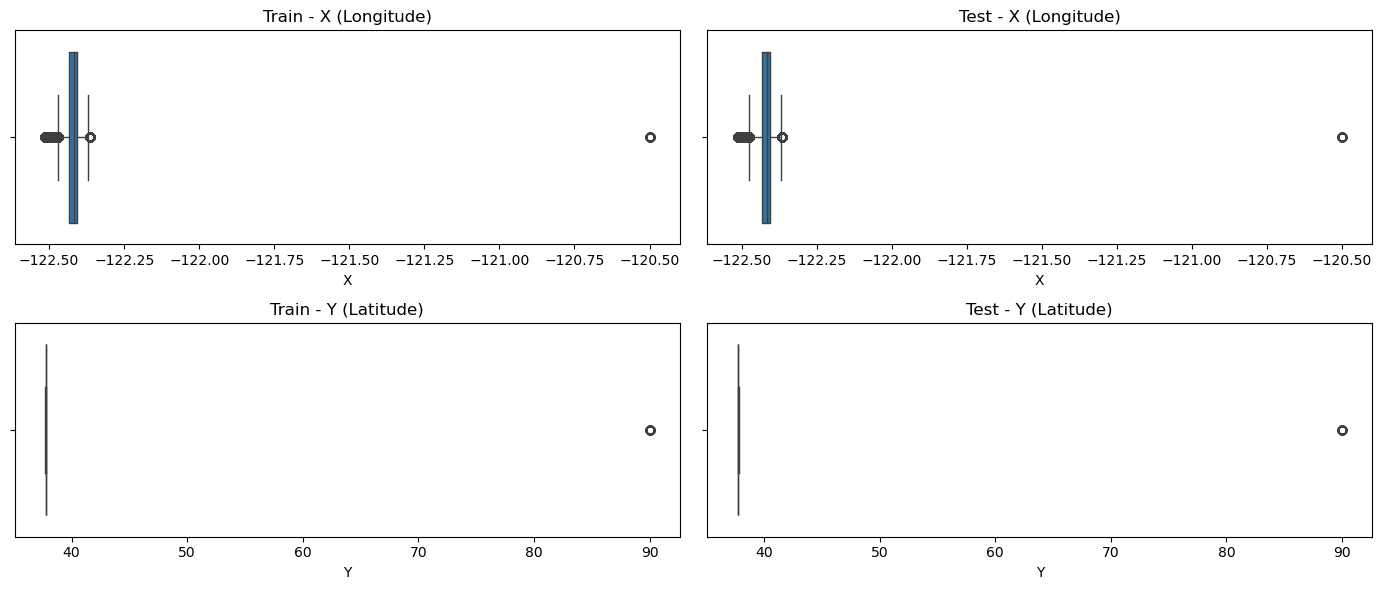

In [32]:
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x=train_df['X'])
plt.title('Train - X (Longitude)')

plt.subplot(2, 2, 2)
sns.boxplot(x=test_df['X'])
plt.title('Test - X (Longitude)')

plt.subplot(2, 2, 3)
sns.boxplot(x=train_df['Y'])
plt.title('Train - Y (Latitude)')

plt.subplot(2, 2, 4)
sns.boxplot(x=test_df['Y'])
plt.title('Test - Y (Latitude)')

plt.tight_layout()
plt.show()

X,Y coloumns have extreme values on both train and test data 

In [34]:
def detect_outliers(df, columns):

    result_df = df.copy()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        result_df[f'{col}_outlier'] = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    return result_df

In [35]:
train_with_outliers = detect_outliers(train_df, ['X', 'Y'])
test_with_outliers = detect_outliers(test_df, ['X', 'Y'])


In [36]:
# Create flags for points that are outliers in both x and y
train_with_outliers['both_outlier'] = train_with_outliers['X_outlier'] & train_with_outliers['Y_outlier']
test_with_outliers['both_outlier'] = test_with_outliers['X_outlier'] & test_with_outliers['Y_outlier']

In [37]:

# Get the outlier points for comparison
train_outliers = train_with_outliers[train_with_outliers['both_outlier']][['X', 'Y']]
test_outliers = test_with_outliers[test_with_outliers['both_outlier']][['X', 'Y']]
print(f"Train outliers count: {len(train_outliers)}")
print(f"Test outliers count: {len(test_outliers)}")


Train outliers count: 67
Test outliers count: 54


In [43]:
# Check if there are common outlier values between train and test
common_outliers = pd.merge(train_outliers, test_outliers, on=['X', 'Y'], how='inner')
print(f"Common outlier points between train and test: {len(common_outliers)}")

if not common_outliers.empty:
    print("Common outlier values:")
    print(common_outliers)


Common outlier points between train and test: 3618
Common outlier values:
          X     Y
0    -120.5  90.0
1    -120.5  90.0
2    -120.5  90.0
3    -120.5  90.0
4    -120.5  90.0
...     ...   ...
3613 -120.5  90.0
3614 -120.5  90.0
3615 -120.5  90.0
3616 -120.5  90.0
3617 -120.5  90.0

[3618 rows x 2 columns]


all outliers have the same value

In [46]:
def remove_outliers(df, outlier_flag_col):
    """
    Remove rows where the outlier flag is True
    """
    return df[~df[outlier_flag_col]]

# Drop the outliers
train_clean = remove_outliers(train_with_outliers, 'both_outlier')
test_clean = remove_outliers(test_with_outliers, 'both_outlier')


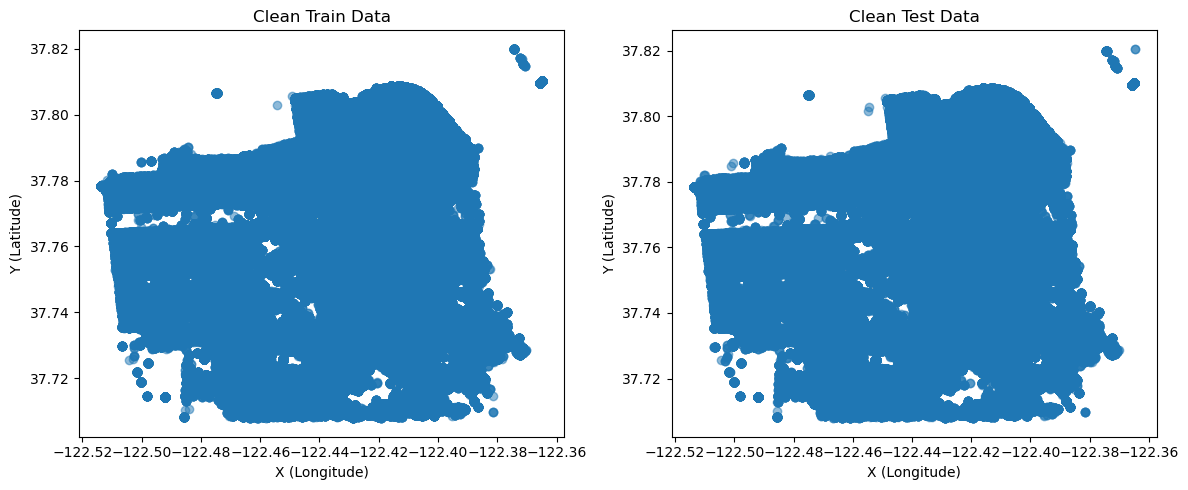

In [48]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_clean['X'], train_clean['Y'], alpha=0.5)
plt.title('Clean Train Data')
plt.xlabel('X (Longitude)')
plt.ylabel('Y (Latitude)')

plt.subplot(1, 2, 2)
plt.scatter(test_clean['X'], test_clean['Y'], alpha=0.5)
plt.title('Clean Test Data')
plt.xlabel('X (Longitude)')
plt.ylabel('Y (Latitude)')

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2676\2870722305.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


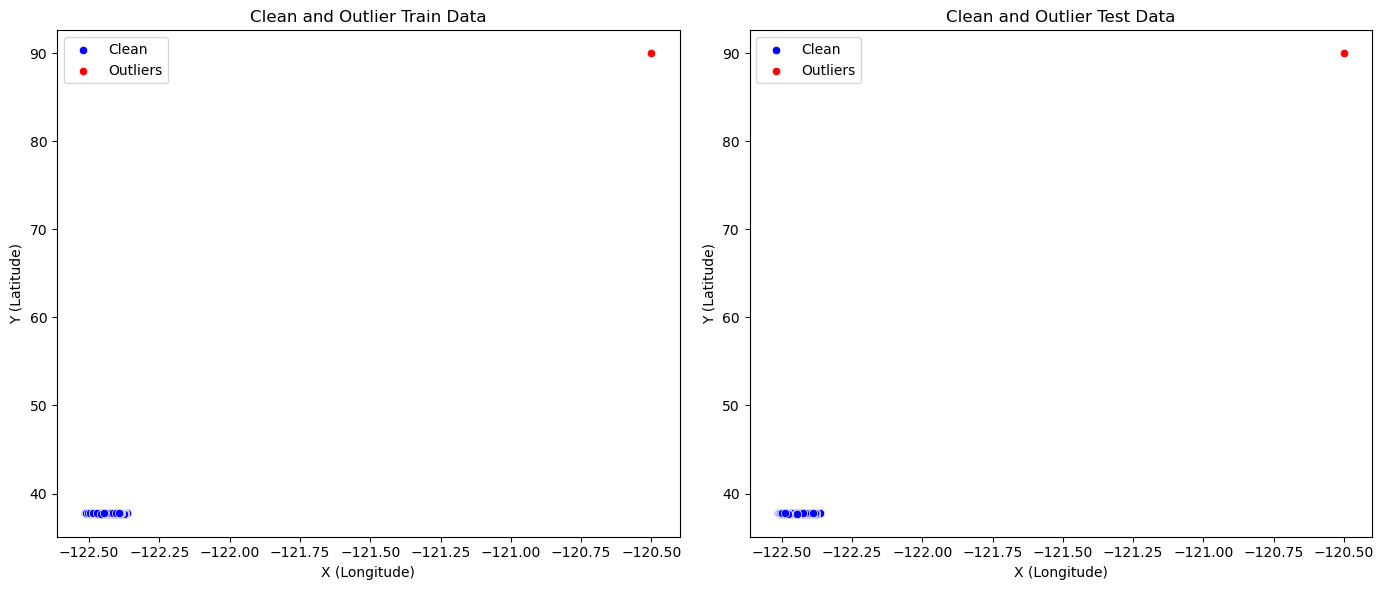

In [49]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train_clean['X'], y=train_clean['Y'], color='blue', label='Clean')
sns.scatterplot(x=train_outliers['X'], y=train_outliers['Y'], color='red', label='Outliers')
plt.title('Clean and Outlier Train Data')
plt.xlabel('X (Longitude)')
plt.ylabel('Y (Latitude)')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=test_clean['X'], y=test_clean['Y'], color='blue', label='Clean')
sns.scatterplot(x=test_outliers['X'], y=test_outliers['Y'], color='red', label='Outliers')
plt.title('Clean and Outlier Test Data')
plt.xlabel('X (Longitude)')
plt.ylabel('Y (Latitude)')
plt.legend()

plt.tight_layout()
plt.show()


## Hierarchical Clustering

In this section of the project, we applied the **Hierarchical Clustering**:algorithm to analyze and segment crime data based on geographic location and time. The main goal of this step is to identify spatial and temporal patterns that may help in predicting future crime occurrences.


### Train Data Preparation for Hierarchical Clustering

In this step, we selected key features for clustering:
- Geographic: `X`, `Y`
- Time-based: `Hour`, `Day`, `Month`

Then we normalized the values using `StandardScaler` to ensure that differences in units do not affect clustering.  
A sample of 5000 records was taken to make processing more efficient and reduce memory usage.


In [52]:
features = ['X', 'Y', 'Hour', 'Day', 'Month']

In [56]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train_clean[features])

In [65]:
# Take a sample to reduce processing load
sampled_df = train_clean.sample(n=5000, random_state=42)  
data_scaled_sample = scaler.fit_transform(sampled_df[features])

### Dendrogram

We used the `linkage` function with the `ward` method to build a hierarchical tree structure that represents data similarity.  
Then, we visualized the structure using a **Dendrogram** to observe distances between data points and determine an appropriate number of clusters.


In [68]:
linked = linkage(data_scaled_sample, method='ward')


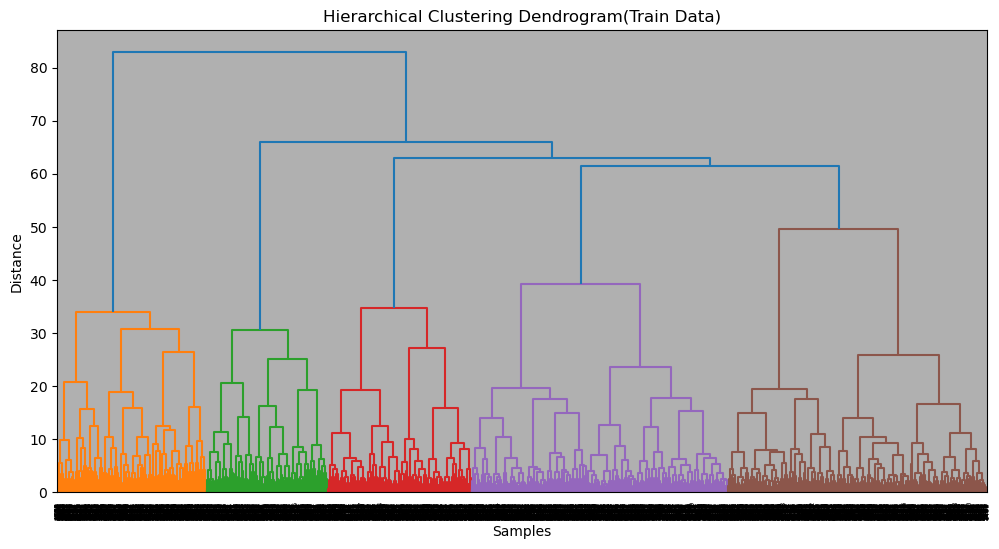

In [126]:
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram(Train Data)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

### Cluster Assignment and Visualization (Training Data)

Based on the Dendrogram, we selected **4 clusters**.  
We used `fcluster` to assign each point to a cluster, and then visualized the results using `seaborn` to understand how crimes are spatially distributed.


In [93]:
num_clusters = 4
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')


In [95]:
sampled_df['Cluster'] = cluster_labels

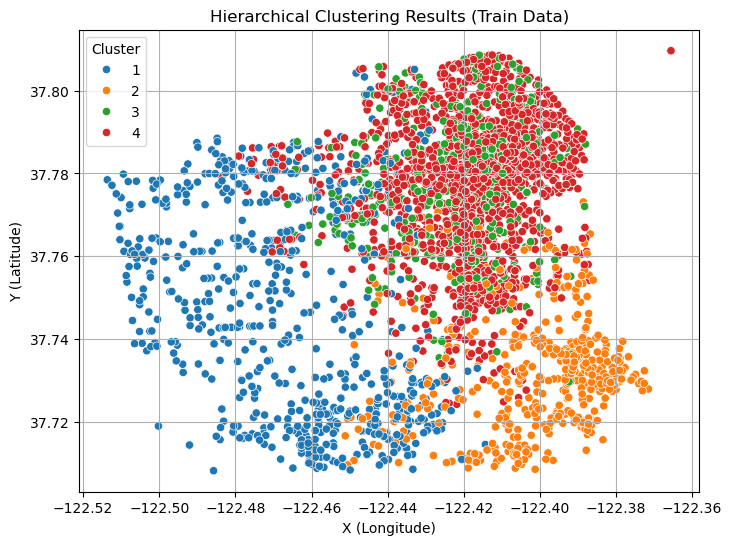

In [122]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sampled_df, x='X', y='Y', hue='Cluster', palette='tab10')
plt.title('Hierarchical Clustering Results (Train Data)')
plt.xlabel('X (Longitude)')
plt.ylabel('Y (Latitude)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

###  Test Data Preparation

The same preprocessing steps were repeated for the train dataset:  
- Selected the same features.
- Applied normalization using `StandardScaler`.
- Took a sample of 5000 records to evaluate the clustering model efficiently.


In [100]:
features = ['X', 'Y', 'Hour', 'Day', 'Month']

In [102]:
scaler = StandardScaler()
data_scaled_test = scaler.fit_transform(test_clean[features])


In [104]:
sampled_test_df = test_clean.sample(n=5000, random_state=42)
data_scaled_sample_test = scaler.fit_transform(sampled_test_df[features])



###  Dendrogram (Test Data)

A similar `Dendrogram` was created for the test dataset to verify clustering structure and consistency.


In [107]:
linked_test = linkage(data_scaled_sample_test, method='ward')

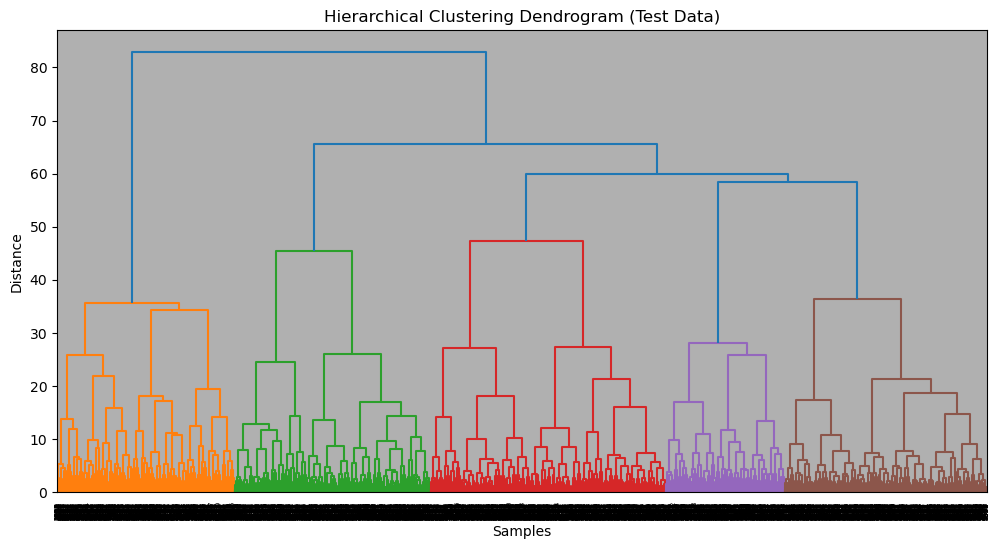

In [108]:
plt.figure(figsize=(12, 6))
dendrogram(linked_test,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Test Data)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

###  Cluster Assignment and Visualization (Testing Data)

We used the same number of clusters (4) on the test data.  
The results were visualized using `seaborn` to check how consistent the clustering behavior is across different datasets.


In [111]:
num_clusters_test = 4
cluster_labels_test = fcluster(linked_test, num_clusters_test, criterion='maxclust')


In [112]:
sampled_test_df['Cluster'] = cluster_labels_test

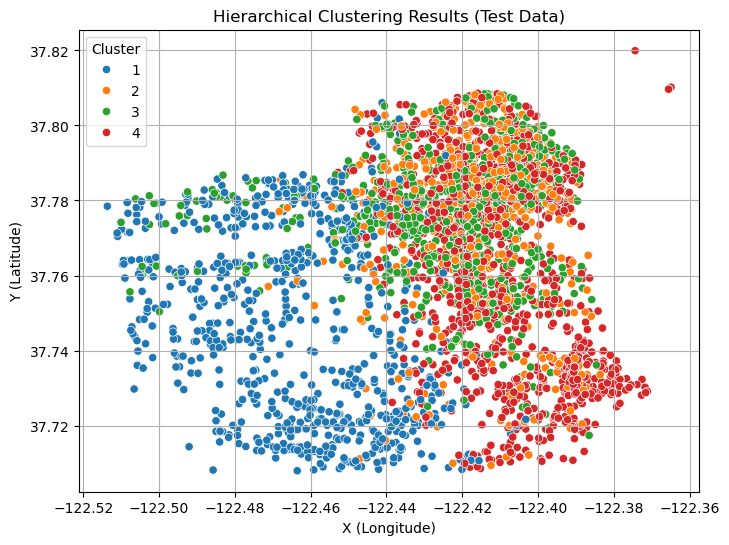

In [113]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sampled_test_df, x='X', y='Y', hue='Cluster', palette='tab10')
plt.title('Hierarchical Clustering Results (Test Data)')
plt.xlabel('X (Longitude)')
plt.ylabel('Y (Latitude)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

By applying this model, we were able to cluster the data into groups with similar characteristics, which helps in understanding potential patterns and guiding security efforts more effectively.
